What is the median household income for each no. of people in household?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

cali = pd.read_csv('california-housing-data.csv')
cali_cleaned = cali[cali.ocean_proximity != 'ISLAND'].dropna()
cali_cleaned['household_average'] = round(cali_cleaned['population']/cali_cleaned['households'], 0)
apartments = cali_cleaned[ (cali_cleaned['household_average'] > 8)].index
cali_cleaned.drop(apartments , inplace=True)
dummies = pd.get_dummies(cali_cleaned.ocean_proximity)
cali_cleaned = cali_cleaned.assign(zmedianincome = lambda x : ((x['median_income']-x['median_income'].mean())/x['median_income'].std()))  # z-score median income
cali_cleaned = cali_cleaned.assign(zhouseage = lambda x : ((x['housing_median_age']-x['housing_median_age'].mean())/x['housing_median_age'].std())) # z-score house age
cali_cleaned = cali_cleaned = cali_cleaned.assign(zhousevalue = lambda x : ((x['median_house_value']-x['median_house_value'].mean())/x['median_house_value'].std())) #z-score house value
dummies = pd.get_dummies(cali_cleaned['ocean_proximity'])
cali_cleaned = pd.merge(cali_cleaned, dummies, left_index=True,
         right_index=True)
cali_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average,zmedianincome,zhouseage,zhousevalue,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,3.0,2.350047,0.982954,2.129660,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.0,2.337489,-0.606378,1.314073,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3.0,1.786621,1.857087,1.258603,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,3.0,0.934834,1.857087,1.164997,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.0,-0.013302,1.857087,1.172798,0,0,1,0


In [28]:
#correlation between median income and household average
cali_cleaned["median_income"].corr(cali_cleaned["household_average"]) 

-0.05714589068503206

In [29]:
#finding how many people have each number of people per household 
cali_cleaned['household_average'].value_counts()

3.0    10765
2.0     5846
4.0     2902
5.0      581
1.0      150
6.0      105
7.0       15
8.0       15
Name: household_average, dtype: int64

In [41]:
#Average median income for households of 3
df3 = cali_cleaned.loc[cali_cleaned['household_average']==3]
df3["median_income"].mean()*10000

42449.11407338598

In [42]:
#Average median income For households of 2
df2 = cali_cleaned.loc[cali_cleaned['household_average']==2]
df2["median_income"].mean()*10000

36542.92011631885

In [43]:
#Average median income For households of 1
df1 = cali_cleaned.loc[cali_cleaned['household_average']==1]
df1["median_income"].mean()*10000

27058.393333333333

In [44]:
#Average median income For households of 4
df4 = cali_cleaned.loc[cali_cleaned['household_average']==4]
df4["median_income"].mean()*10000

32275.57753273605

In [45]:
#Average median income For households of 5
df5 = cali_cleaned.loc[cali_cleaned['household_average']==5]
df5["median_income"].mean()*10000

27988.593803786578

In [46]:
#Average median income For households of 6
df6 = cali_cleaned.loc[cali_cleaned['household_average']==6]
df6["median_income"].mean()*10000

31731.00952380952

In [47]:
#Average median income For households of 7
df7 = cali_cleaned.loc[cali_cleaned['household_average']==7]
seven["median_income"].mean()*10000

35601.53333333333

In [48]:
#Average median income For households of 8
df8 = cali_cleaned.loc[cali_cleaned['household_average']==8]
df8["median_income"].mean()*10000

34028.46666666667

<Axes: xlabel='household_average', ylabel='median_income'>

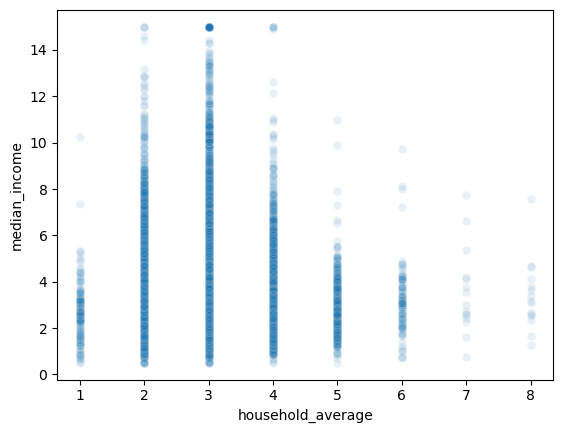

In [38]:
#graphical representation
sns.scatterplot (x="household_average",
                    y="median_income",
                    data=cali_cleaned,
                    alpha = 0.1)

<Axes: xlabel='household_average', ylabel='median_income'>

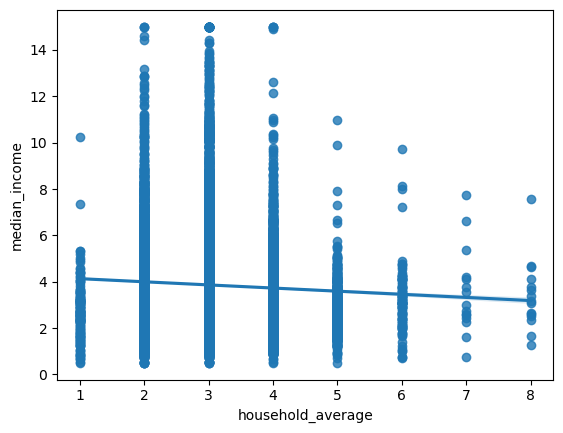

In [4]:
sns.regplot(x='household_average', y='median_income', data=cali_cleaned)

In [18]:
#Caluculating testing and training scores for the linear regression of household average and median income
X = cali_cleaned[['household_average']] 
Y = cali_cleaned['median_income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
training_score = linear.score(X, Y) 
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Correlation score is 0.057
Coefficients are [-0.133]
Intercept is 4.259
Training score is 0.003
Testing score is 0.004


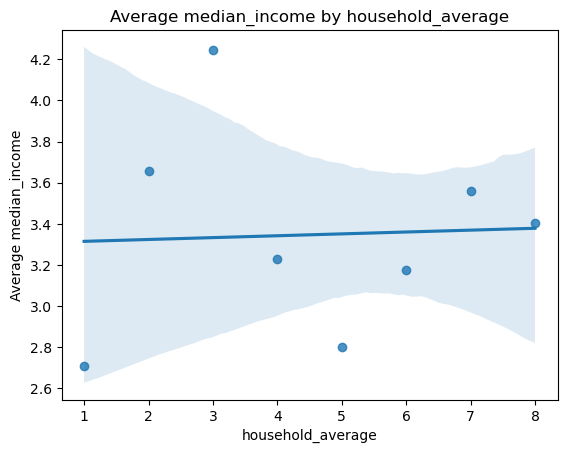

In [65]:
#Grapical representation of household average and average median income
grouped = cali_cleaned.groupby('household_average')['median_income'].mean().reset_index()
sns.regplot(x='household_average', y='median_income', data=grouped)
plt.xlabel('household_average')
plt.ylabel('Average median_income')
plt.title('Average median_income by household_average')
plt.show()

In [69]:
#Caluculating testing and training scores for the linear regression of household average and average median income
X = grouped[['household_average']]
y = grouped['median_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.039158003652879136
Testing R^2 score: -1.0884409298044484


Taking different approach in attempts to find better correlation:
Not rounding the household average

In [1]:
#import the house data again, without rounding the household average
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

cali = pd.read_csv('california-housing-data.csv')
cali1 = cali[cali.ocean_proximity != 'ISLAND'].dropna()
cali1['household_average'] = cali1['population']/cali1['households']
apartments = cali1[ (cali1['household_average'] > 8)].index
cali1.drop(apartments , inplace=True)
cali1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.181467


In [2]:
#finding correlation of raw household average and median income
cali1["median_income"].corr(cali1["household_average"])

-0.06658784472799086

<Axes: xlabel='household_average', ylabel='median_income'>

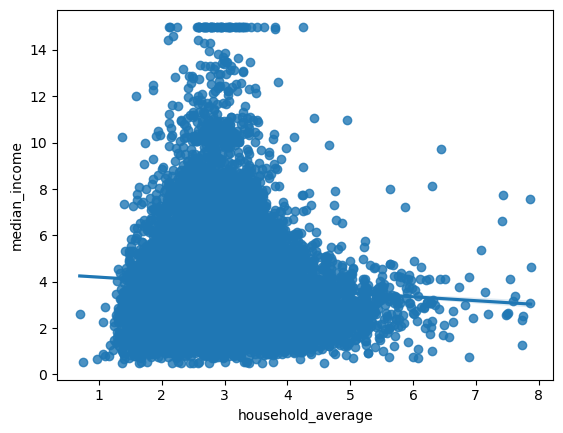

In [3]:
#Graph and regression plot of raw household average and median income
sns.regplot(x="household_average",
                    y="median_income",
                    data=cali1)

In [70]:
#Finding training and testing scores of regression plot of raw household average and median income
X = cali1[['household_average']]
y = cali1['median_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the R^2 scores
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.0036357485959800373
Testing R^2 score: 0.00734099939936983


In [4]:
#binning the houshold averages
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
cali1['Bins'] = pd.cut(cali1['household_average'], bins)
cali1['Bins'].value_counts()

(2, 3]    10880
(3, 4]     6191
(1, 2]     1638
(4, 5]     1372
(5, 6]      231
(6, 7]       43
(7, 8]       17
(0, 1]        3
Name: Bins, dtype: int64

In [11]:
#(2,3] people
two_to_three = cali1.loc[(cali1['household_average']>2) & (cali1['household_average'] <= 3)]
two_to_three["median_income"].mean()*10000

40605.89577205883

In [10]:
#(3,4] people
three_to_four = cali1.loc[(cali1['household_average']>3) & (cali1['household_average'] <= 4)]
three_to_four["median_income"].mean()*10000

39530.190276207395

In [12]:
#(1,2] people
one_to_two = cali1.loc[(cali1['household_average']>1) & (cali1['household_average'] <= 2)]
one_to_two["median_income"].mean()*10000

33088.88888888889

In [13]:
#(4,5] people
four_to_five = cali1.loc[(cali1['household_average']>1) & (cali1['household_average'] <= 2)]
four_to_five["median_income"].mean()*10000

28643.026967930033

In [14]:
#(5,6] people
five_to_six = cali1.loc[(cali1['household_average']>5) & (cali1['household_average'] <= 6)]
five_to_six["median_income"].mean()*10000

29289.70995670995

In [15]:
#(6,7] people
six_to_seven = cali1.loc[(cali1['household_average']>6) & (cali1['household_average'] <= 7)]
six_to_seven["median_income"].mean()*10000

31025.813953488367

In [16]:
#(7,8] people
seven_to_eight = cali1.loc[(cali1['household_average']>7) & (cali1['household_average'] <= 8)]
seven_to_eight["median_income"].mean()*10000

38716.23529411765

In [17]:
#(0,1] people
zero_to_one = cali1.loc[(cali1['household_average']>0) & (cali1['household_average'] <= 1)]
zero_to_one["median_income"].mean()*10000

12692.666666666668

- 2-4 people households have highest median income (around average income in California): most likely reflecting stable families
- 4-7 people households have below average income in california: most likely reflecting working class families who lack education -> low education leads to less education around reproduction, leading to large families and not high paying jobs
- 1 people households have lowest median income: likely reflecting students.

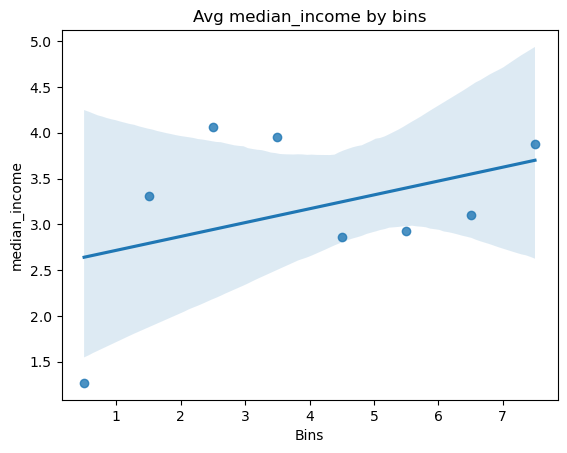

In [25]:
#Graph and regression plot of binned household averages and median income
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
cali1['Bins'] = pd.cut(cali1['household_average'], bins)
grouped = cali1.groupby('Bins')['median_income'].mean()
bin_centers = [(bin.left + bin.right) / 2 for bin in grouped.index]

sns.regplot(x=bin_centers, y=grouped)
plt.xlabel('Bins')
plt.ylabel('median_income')
plt.title('Avg median_income by bins')
plt.show()


Follows same pattern as the rounded household average and average median income.